In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/Dockship/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
import tensorflow as tf
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,AveragePooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [ ]:
data_train = '/tmp/CIFAR10/train'
data_test = '/tmp/CIFAR10/test'

In [ ]:
imagepaths = list(paths.list_images(data_train))
random.shuffle(imagepaths)
random.seed(42)
data_images = []
labels = []
for imgpath in imagepaths:
	label = imgpath.split(os.path.sep)[-2]
	img = load_img(imgpath, target_size=(32, 32))
	data_images.append(img_to_array(img)/255.)
	labels.append(label) 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels_z = lb.fit_transform(np.array(labels))
labels_value = to_categorical(labels_z,num_classes=10)
data = np.array(data_images,dtype='float32')

In [ ]:
trainX, testX,trainY, testY = train_test_split(data, labels_value,test_size=0.2, random_state=42,shuffle = True)

In [ ]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.1))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'));return model

mobile = define_model()

In [ ]:
op_layer = mobile.output
final_layer = Dense(128,activation='relu',kernel_initializer='he_uniform')(op_layer)
final_layer = Dense(128,activation='relu',kernel_initializer='he_uniform')(final_layer)
final_layer = Dense(10,activation= 'softmax')(final_layer)
from keras.models  import Model
# Define model input and output
model = Model(inputs = mobile.input , outputs = final_layer)
opt = SGD(lr=0.01, momentum=0.9)
import keras
optimizer_sgd = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
'''
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# define model
cnn = define_model()
'''

In [ ]:
# plot diagnostic learning curves
import matplotlib.pyplot as plt
def summarize_diagnostics(hist):
	plt.plot(hist.history["accuracy"])
	plt.plot(hist.history['val_accuracy'])
	plt.plot(hist.history['loss'])
	plt.plot(hist.history['val_loss'])
	plt.title("model accuracy")
	plt.ylabel("Accuracy")
	plt.xlabel("Epoch")
	plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
	plt.show()

Epoch 1/100
625/625 [==============================] - 21s 34ms/step - loss: 0.1219 - accuracy: 0.9609 - val_loss: 0.3691 - val_accuracy: 0.8947
Epoch 2/100
625/625 [==============================] - 21s 33ms/step - loss: 0.1239 - accuracy: 0.9609 - val_loss: 0.4075 - val_accuracy: 0.8925
Epoch 3/100
625/625 [==============================] - 21s 33ms/step - loss: 0.1326 - accuracy: 0.9572 - val_loss: 0.3460 - val_accuracy: 0.9007
Epoch 4/100
625/625 [==============================] - 21s 33ms/step - loss: 0.1280 - accuracy: 0.9593 - val_loss: 0.3440 - val_accuracy: 0.8993
Epoch 5/100
625/625 [==============================] - 21s 34ms/step - loss: 0.1239 - accuracy: 0.9616 - val_loss: 0.3429 - val_accuracy: 0.9027
Epoch 6/100
625/625 [==============================] - 21s 33ms/step - loss: 0.1243 - accuracy: 0.9605 - val_loss: 0.3258 - val_accuracy: 0.9045
Epoch 7/100
625/625 [==============================] - 21s 33ms/step - loss: 0.1254 - accuracy: 0.9599 - val_loss: 0.3333 - val_ac

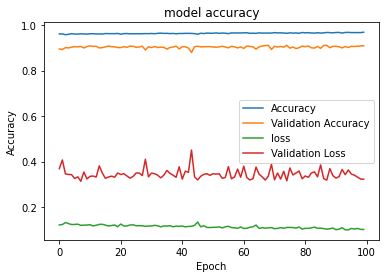

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,zoom_range=0.1)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	hist = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(hist)

# entry point, run the test harness
run_test_harness()

In [ ]:
model.save('/content/gdrive/My Drive/Dockship/model4.h5')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(testX)
y_p = np.argmax(y_pred,axis=1)
y_true = np.argmax(testY,axis=1)
print(confusion_matrix(y_true,y_p))
print('Classification report')
print(classification_report(y_true,y_p))

[[907  10  19   4   6   3   3   6  13  11]
 [  1 967   0   2   0   1   0   1   2  16]
 [ 29   2 870  14  14   8  26  11   3   4]
 [  8   2  29 773  36  64  36  19   2   6]
 [  2   0  10  11 942   9  18  18   0   1]
 [  5   2  25  75  27 826  23  37   2   0]
 [  6   1  15  14   5   4 968   4   0   1]
 [  6   1   8  11  20   5   2 953   0   2]
 [ 26  20   3   0   3   2   5   3 934   8]
 [  6  42   1   1   1   0   3   3   2 950]]
Classification report
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       982
           1       0.92      0.98      0.95       990
           2       0.89      0.89      0.89       981
           3       0.85      0.79      0.82       975
           4       0.89      0.93      0.91      1011
           5       0.90      0.81      0.85      1022
           6       0.89      0.95      0.92      1018
           7       0.90      0.95      0.92      1008
           8       0.97      0.93      0.95      1004
      

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
model_new = Model(inputs = model.input,outputs = op_layer)
train_new = sc.fit_transform(model_new.predict(trainX))
test_new = sc.fit_transform(model_new.predict(testX))
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(train_new,np.argmax(trainY,axis=1))
svm.score(train_new,np.argmax(trainY,axis=1))

0.9942

In [ ]:
svm.score(test_new,np.argmax(testY,axis=1))

0.9096

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(train_new,np.argmax(trainY,axis=1))
xg.score(train_new,np.argmax(trainY,axis=1))

0.99085

In [ ]:
xg.score(test_new,np.argmax(testY,axis=1))

0.9083

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/Dockship/model4.h5',compile = True)

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img



In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
from imutils import paths
import numpy as np
print("[INFO] loading images...")
imagePaths = list(paths.list_images(data_test))
imagePaths = sorted(imagePaths)
op = []
name = []
# loop over the image paths
for imagePath in imagePaths:
	img = load_image(imagePath)
	name.append(imagePath.split(os.path.sep)[-1])
	result = lb.inverse_transform(np.argmax(svm.predict(model_new.predict(img),axis=1)))
	for i in result:
		op.append(i)

[INFO] loading images...


In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(name, op)), columns =['filename', 'label']) 
df.head()

,filename,label
0,00001_test.png,dog
1,00002_test.png,deer
2,00003_test.png,frog
3,00004_test.png,airplane
4,00005_test.png,frog


In [ ]:
df.to_csv('/content/gdrive/My Drive/Dockship/output.csv',index=False)

In [ ]:
img = load_img(imagePaths[3],target_size=(128, 64))
print(imagePaths[3])
import matplotlib.pyplot as plt
plt.imshow(img)

NameError: ignored

In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image(imagePaths[33])
	# load model
	#model = load_model('final_model.h5')
	# predict the class
	result = model_new.predict(img)
	result = svm.predict(result)
	print(result)
 
# entry point, run the example
run_example()

[8]


In [ ]:
label = imagePaths[0].split(os.path.sep)[-1]
label model.predict_classes

'00001_test.png'